In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import fnmatch

In [3]:
df = pd.read_parquet('data/streamflow_prediction_dataset.parquet')
display(df)

,SNWD_BisonLake,SNWD_McClurePass,WTEQ_BisonLake,WTEQ_McClurePass,PREC_BisonLake,PREC_McClurePass,PRCP_BisonLake,PRCP_McClurePass,TAVG_BisonLake,TAVG_McClurePass,...,soilmoisture_station607_4ft,soilmoisture_station607_8ft,soilmoisture_station607_20ft,soilmoisture_station680_2ft,soilmoisture_station680_8ft,soilmoisture_station680_20ft,soilmoisture_station802_2ft,soilmoisture_station802_8ft,soilmoisture_station802_20ft,streamflow
date,,,,,,,,,,,,,,,,,,,,,
2008-03-12,82.0,60.0,28.6,23.9,29.1,22.9,0.1,0.0,19.4,30.2,...,10.2,24.2,25.8,14.6,11.7,26.0,4.0,1.3,6.5,2360.0
2008-03-15,86.0,63.0,29.2,24.5,29.7,23.4,0.1,0.2,11.7,23.4,...,10.3,24.4,25.4,14.7,11.7,26.2,4.0,1.4,6.9,2260.0
2008-03-17,84.0,63.0,29.3,24.8,29.8,23.6,0.0,0.2,14.4,24.3,...,10.3,24.7,25.2,14.4,12.1,26.1,4.1,1.4,6.7,2260.0
2008-03-18,83.0,62.0,29.3,24.8,29.8,23.6,0.0,0.0,11.8,23.9,...,10.6,24.9,25.3,14.7,12.1,26.0,4.0,1.4,6.6,2260.0
2008-03-19,82.0,61.0,29.4,24.9,29.8,23.6,0.0,0.0,20.8,30.2,...,10.6,25.0,25.1,14.6,11.7,25.9,4.0,1.6,6.9,2200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-23,0.0,0.0,0.0,0.0,27.7,20.7,0.2,0.2,52.9,62.1,...,13.8,14.5,11.5,35.5,14.2,30.2,24.1,5.5,9.2,1170.0
2021-07-24,0.0,0.0,0.0,0.0,27.7,21.1,0.0,0.4,54.7,57.0,...,13.4,14.1,11.3,33.7,13.9,30.2,24.0,5.3,8.7,1240.0
2021-07-25,0.0,0.0,0.0,0.0,27.8,21.5,0.1,0.4,52.7,57.6,...,13.1,13.9,10.8,39.8,13.8,30.2,23.8,5.0,8.1,1190.0


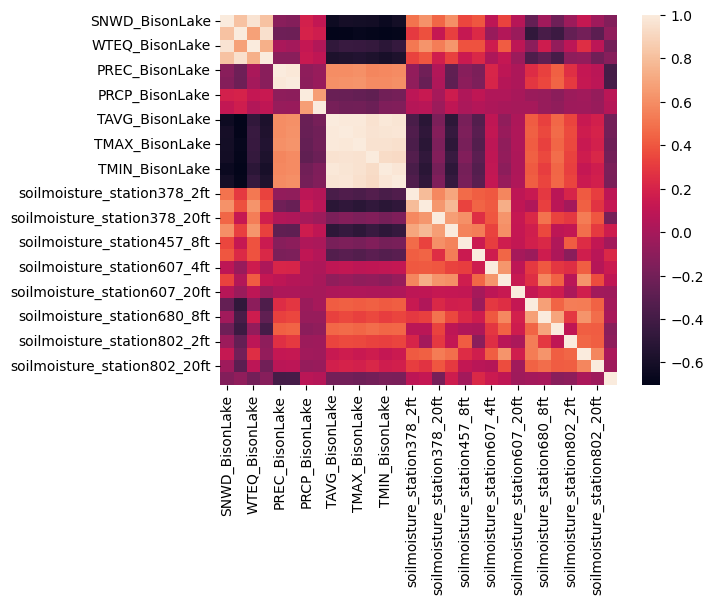

In [4]:
sns.heatmap(df.corr())
plt.show()

Good reminder that a lot of features are redundant. TAVG, TMAX, and TMIN are average, max, and min temperatures for a given day. We can drop TMAX and TMIN. SNWD and WTEQ are snow depth and snow water equivalent, respectively. These two features are highly correlated. We will select snow water equivalent. PREC and PRCP mean precipitation accumulation and precipitation increment. Since we are using daily values, these two measures are identical. Accumulation measures the accumulation of rain over the course of a period, whereas increment will measure the incremental rainfall in shorter periods. Since our period is "daily", we're showing the incremental daily rain, which equals the accumulated rain total for that day.

We will also drop streamflow from the dataset as this is the value we aim to predict in future ML applications.

,WTEQ_BisonLake,WTEQ_McClurePass,PREC_BisonLake,PREC_McClurePass,TAVG_BisonLake,TAVG_McClurePass,soilmoisture_station378_2ft,soilmoisture_station378_8ft,soilmoisture_station378_20ft,soilmoisture_station457_2ft,...,soilmoisture_station457_20ft,soilmoisture_station607_4ft,soilmoisture_station607_8ft,soilmoisture_station607_20ft,soilmoisture_station680_2ft,soilmoisture_station680_8ft,soilmoisture_station680_20ft,soilmoisture_station802_2ft,soilmoisture_station802_8ft,soilmoisture_station802_20ft
date,,,,,,,,,,,,,,,,,,,,,
2008-03-12,28.6,23.9,29.1,22.9,19.4,30.2,32.2,35.4,23.9,18.7,...,20.9,10.2,24.2,25.8,14.6,11.7,26.0,4.0,1.3,6.5
2008-03-15,29.2,24.5,29.7,23.4,11.7,23.4,32.1,35.6,24.1,18.7,...,20.9,10.3,24.4,25.4,14.7,11.7,26.2,4.0,1.4,6.9
2008-03-17,29.3,24.8,29.8,23.6,14.4,24.3,32.2,35.6,24.2,19.0,...,21.0,10.3,24.7,25.2,14.4,12.1,26.1,4.1,1.4,6.7
2008-03-18,29.3,24.8,29.8,23.6,11.8,23.9,32.2,35.6,24.2,19.0,...,21.2,10.6,24.9,25.3,14.7,12.1,26.0,4.0,1.4,6.6
2008-03-19,29.4,24.9,29.8,23.6,20.8,30.2,32.2,35.6,24.2,18.9,...,21.1,10.6,25.0,25.1,14.6,11.7,25.9,4.0,1.6,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-23,0.0,0.0,27.7,20.7,52.9,62.1,21.2,17.1,18.4,4.2,...,1.5,13.8,14.5,11.5,35.5,14.2,30.2,24.1,5.5,9.2
2021-07-24,0.0,0.0,27.7,21.1,54.7,57.0,19.6,17.0,18.4,3.8,...,1.6,13.4,14.1,11.3,33.7,13.9,30.2,24.0,5.3,8.7
2021-07-25,0.0,0.0,27.8,21.5,52.7,57.6,19.7,16.8,18.4,3.9,...,1.4,13.1,13.9,10.8,39.8,13.8,30.2,23.8,5.0,8.1


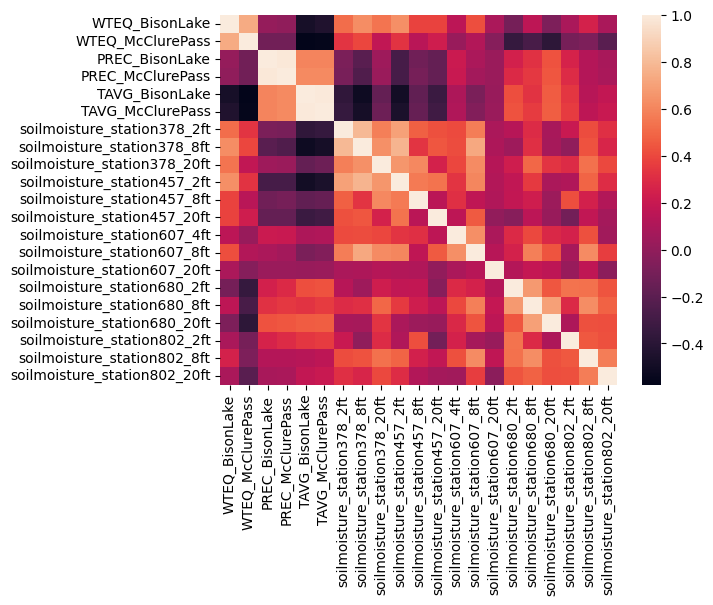

In [5]:
drop_cols = ['TMAX', 'TMIN', 'SNWD', 'PRCP', 'streamflow']

for c in drop_cols:
    for col in df.columns:
        if fnmatch.fnmatch(col, f"*{c}*"):
            df = df.drop(columns=[col])

display(df)
df.to_csv('data/streamflow_prediction_dataset_dropped_cols.csv')

sns.heatmap(df.corr())
plt.show()

In [6]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled, columns=df.columns, index=df.index)
display(df_scaled)

,WTEQ_BisonLake,WTEQ_McClurePass,PREC_BisonLake,PREC_McClurePass,TAVG_BisonLake,TAVG_McClurePass,soilmoisture_station378_2ft,soilmoisture_station378_8ft,soilmoisture_station378_20ft,soilmoisture_station457_2ft,...,soilmoisture_station457_20ft,soilmoisture_station607_4ft,soilmoisture_station607_8ft,soilmoisture_station607_20ft,soilmoisture_station680_2ft,soilmoisture_station680_8ft,soilmoisture_station680_20ft,soilmoisture_station802_2ft,soilmoisture_station802_8ft,soilmoisture_station802_20ft
date,,,,,,,,,,,,,,,,,,,,,
2008-03-12,1.883552,3.196112,0.342990,0.509263,-0.814967,-0.741420,0.740597,0.920122,0.648393,0.475802,...,0.193986,-1.005935,-0.005907,-0.087666,-1.006524,-0.508549,-0.749191,-1.060531,-1.166220,-0.465500
2008-03-15,1.943418,3.293490,0.385416,0.557196,-1.274531,-1.161009,0.727894,0.944797,0.677460,0.475802,...,0.193986,-0.996075,0.015597,-0.087700,-0.993916,-0.508549,-0.707242,-1.060531,-1.146229,-0.405506
2008-03-17,1.953396,3.342180,0.392487,0.576370,-1.113385,-1.105475,0.740597,0.944797,0.691994,0.513427,...,0.200775,-0.996075,0.047854,-0.087718,-1.031742,-0.444300,-0.728216,-1.048451,-1.146229,-0.435503
2008-03-18,1.953396,3.342180,0.392487,0.576370,-1.268562,-1.130157,0.740597,0.944797,0.691994,0.513427,...,0.214353,-0.966494,0.069358,-0.087709,-0.993916,-0.444300,-0.749191,-1.060531,-1.146229,-0.450502
2008-03-19,1.963373,3.358410,0.392487,0.576370,-0.731410,-0.741420,0.740597,0.944797,0.691994,0.500885,...,0.207564,-0.966494,0.080110,-0.087726,-1.006524,-0.508549,-0.770166,-1.060531,-1.106247,-0.405506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-23,-0.970057,-0.682804,0.243995,0.298355,1.184432,1.226948,-0.656634,-1.337656,-0.150959,-1.342745,...,-1.123074,-0.650968,-1.048870,-0.088893,1.628705,-0.106994,0.131751,1.367593,-0.326606,-0.060535
2021-07-24,-0.970057,-0.682804,0.243995,0.336702,1.291862,0.912256,-0.859867,-1.349994,-0.150959,-1.392912,...,-1.116285,-0.690409,-1.091878,-0.088910,1.401747,-0.155181,0.131751,1.355512,-0.366587,-0.135529
2021-07-25,-0.970057,-0.682804,0.251066,0.375049,1.172495,0.949278,-0.847165,-1.374669,-0.150959,-1.380371,...,-1.129863,-0.719989,-1.113383,-0.088953,2.170881,-0.171243,0.131751,1.331352,-0.426560,-0.225521


## 3 Components

In [7]:
# PCA
components = 3
pca = PCA(n_components=components)
pca.fit(df)

df_pca = pd.DataFrame(
    pca.transform(df), 
    columns=[f'PC{n+1}' for n in range(0,components)], 
    index=df.index
)
display(df_pca)

print(f"Explained Variance with {components} components: {pca.explained_variance_ratio_.sum()*100:.2f}%")

,PC1,PC2,PC3
date,,,
2008-03-12,-1021.971054,22.610200,4.247154
2008-03-15,-1022.371487,30.408159,3.839125
2008-03-17,-1022.571249,28.511002,4.505413
2008-03-18,-1022.471308,30.214762,4.536593
2008-03-19,-1022.670723,21.842089,5.726391
...,...,...,...
2021-07-23,-1036.271276,-36.857547,-12.463828
2021-07-24,-1036.471823,-35.275929,-14.026421
2021-07-25,-1036.971419,-35.283413,-13.384042


Explained Variance with 3 components: 100.00%


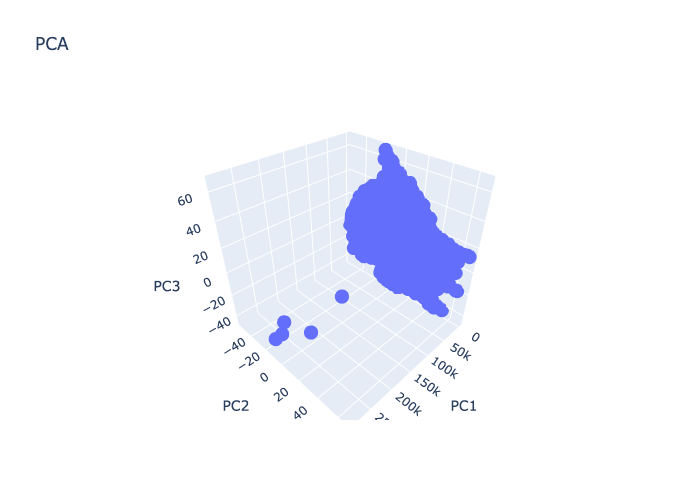

In [8]:
# 3D plot
fig = px.scatter_3d(
    df_pca, 
    x='PC1', 
    y='PC2', 
    z='PC3', 
    title='PCA'
)
fig.show("png")

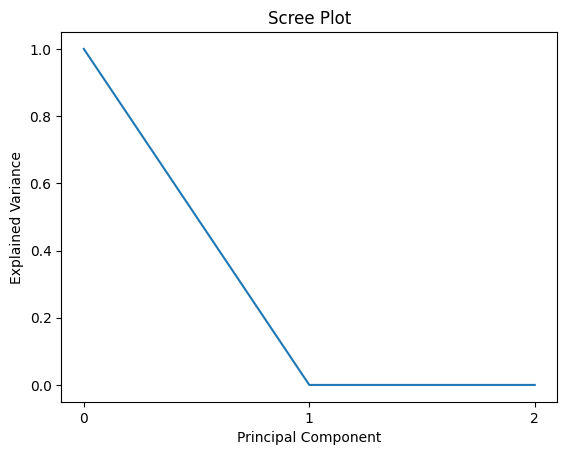

In [9]:
# Scree plot
plt.plot(pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.xticks(range(0, components))
plt.ylabel('Explained Variance')
plt.show()

<Axes: >

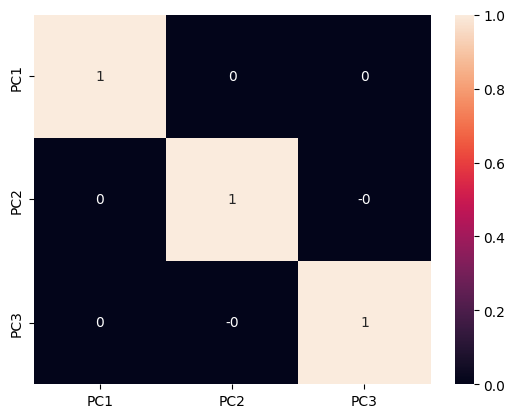

In [10]:
sns.heatmap(df_pca.corr().apply(lambda x: round(x,8)), annot=True)

Proof of no correlation

In [11]:
# Loadings
loadings = pca.components_.T

df_loadings = pd.DataFrame(
    loadings, 
    columns = [f'PC{n+1}' for n in range(0,components)], 
    index=df.columns
)

display(df_loadings)

,PC1,PC2,PC3
WTEQ_BisonLake,0.000079,0.175965,0.260975
WTEQ_McClurePass,-0.000023,0.118754,0.044725
PREC_BisonLake,0.000034,-0.346831,0.268762
PREC_McClurePass,0.000025,-0.261255,0.195453
TAVG_BisonLake,0.000038,-0.558725,0.067593
TAVG_McClurePass,0.000043,-0.535658,0.095225
soilmoisture_station378_2ft,0.000061,0.122124,0.255191
soilmoisture_station378_8ft,0.000071,0.168061,0.253477
soilmoisture_station378_20ft,0.000076,0.055520,0.235689
soilmoisture_station457_2ft,0.000080,0.165979,0.247819


## 2 Components

In [12]:
# PCA
components = 2
pca = PCA(n_components=components)
pca.fit(df)

df_pca = pd.DataFrame(
    pca.transform(df), 
    columns=[f'PC{n+1}' for n in range(0,components)], 
    index=df.index
)
display(df_pca)

print(f"Explained Variance with {components} components: {pca.explained_variance_ratio_.sum()*100:.2f}%")

,PC1,PC2
date,,
2008-03-12,-1021.971054,22.610200
2008-03-15,-1022.371487,30.408159
2008-03-17,-1022.571249,28.511002
2008-03-18,-1022.471308,30.214762
2008-03-19,-1022.670723,21.842089
...,...,...
2021-07-23,-1036.271276,-36.857547
2021-07-24,-1036.471823,-35.275929
2021-07-25,-1036.971419,-35.283413


Explained Variance with 2 components: 100.00%


In [13]:
# 2D plot
fig = px.scatter(
    df_pca, 
    x='PC1', 
    y='PC2', 
    title='PCA'
)
fig.show()